# The power of neural networks

Neurons can be used to model logic gates, the building blocks behind all digital computing. In this compulsory task we talk you through how to do so. We also explain how to represent neural networks in terms of matrix computations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Neurons as logic gates

A neuron works by applying an activation function, usually the sigmoid function, to a combination of inputs, input weights and a bias. 

In [2]:
class Neuron():
  
  def __init__(self, W, b):
    self.W = W
    self.b = b
    
  def activate(self, X):
    return sigmoid(W * X + b)










Here's a reminder of what the sigmoid function is and what it's output looks like:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$


(-10.0, 10.0)

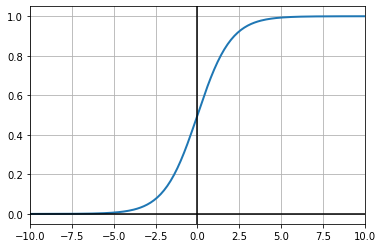

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
  
inputs = np.arange(-100,100, step=0.1)
plt.plot(inputs, sigmoid(inputs), linewidth=2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-10, 10])

### Logic gates

A logic gate takes in two boolean inputs (0 or 1, i.e. True or False) and returns a single boolean output. An OR gate, for example, returns a 1 if either of the inputs is 1 or both are 1, and 0 only if both inputs are 0. 


Can we design a neuron which produces the same outputs as an OR gate? 

In other words, can we find $w_1$, $w_2$ and $b$, such that $z$ in the following formula

$$
z = w_1 x_1 + w_2 x_2 + b
$$

corresponds to the outputs in the following OR gate truth table

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

It turns out that we can.
To make it easier to understand how, let's tease apart the weights and inputs of our neuron class to allow 2 inputs and 2 weights.

In [4]:
class Neuron():
  
  def __init__(self, w1, w2, b):
    self.w1 = w1
    self.w2 = w2
    self.b = b
    
  def activate(self, x1, x2):
    return sigmoid(self.w1 * x1 + self.w2 * x2 + self.b)
 
logic_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

#### Bias

The bias determines the value of $z$ if both inputs are 0.
If both inputs are 0 we want the output to also be 0. So we must solve:

$$
0 =\sigma(0 + 0 + b)
$$


The sigmoid function outputs values close to 0 if the input is about -7.5 or less, so $b$ must be at least that small. Let's specify $b$ to be -10.

In [5]:
b = -10

#### Weights

The weights determine what happens when $x_1$ and/or $x_2$ are 1.
In all the cases the output should be 1.

The sigmoid function outputs about 1 for values larger than about 7.5, let's say 10. For either $w_1 + 0 + -10$ or $0 + w_1 + -10$ to be 10 or more, the weights must be at least 20. 

This also gives the correct output if both inputs are 1. 

In [6]:
w1, w2 = 20, 20

Let's try it out.

In [7]:
def make_truth_table(gate):
  for x1, x2 in logic_inputs:
    output = gate.activate(x1, x2)
    print("{}, {}: {}".format(x1, x2, np.round(output)))

or_gate = Neuron(w1, w2, b)
make_truth_table(or_gate)


0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


### Exercise
Try to figure out what values for the neurons would model an AND gate.

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

In [8]:
# Fix this AND gate so its outputs are correct.

and_gate = Neuron(w1 = 10, w2 = 10, b = -15)

make_truth_table(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


### Exercise
Do the same for the NOR gate and the NAND gate.

<table>

<tr>
<th colspan="3">NOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [9]:
nor_gate = Neuron(w1 = -20, w2 = -20, b = 10)

make_truth_table(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


<table>

<tr>
<th colspan="3">NAND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

In [10]:
nand_gate = Neuron(w1 = -10, w2 = -10, b = 20)

make_truth_table(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


### The XOR Gate

Of all logic gates the most important in computer science is the exclusive or or XOR gate. 

It turns out there is no configuration for our neuron that will replicate the XOR gate truth table. 

However, the XOR can be modeled by combining three of the gates we just made.  In other words,
by combining several neurons into a network.

See if you can find the combination of gates that produces this table:

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>




### Exercise

Try to combine the gates we discussed. It's already if you do so by trial and error. To help you out, the code below specifies that our combination
first passes the inputs to two separate hidden gates or hidden neurons, and then passes the outcome of that to a single output neuron

This is were I have a problem I am confussed.

In [11]:
# Uncomment the xor_gate line and find out which neurons besides the or_gate neuron the 
# network should have in its hidden and output layer to produce the right values.

class Network():
  
  def __init__(self, gate1, gate2, out_gate):
        self.hidden_neuron1 = gate1
        self.hidden_neuron2 = gate2
        self.out_neuron = out_gate
   
  def activate(self, x1, x2):
        z1 = self.hidden_neuron1.activate(x1, x2)
        z2 = self.hidden_neuron2.activate(x1, x2)
        return self.out_neuron.activate(z1, z2)
  
xor_gate = Network(nand_gate, or_gate , and_gate)
make_truth_table(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Matrix Computations

The code for a single neuron is fairly simple. When we combine neurons, however, the input is passed through multiple neurons in a hidden layer, which can be very large. The output of the hidden layer is itself either passed to more layers or an output layer of variable size. This can involve absolutely huge computations which are hard to understand and code efficiently.

To understand these computations and work with neural network libraries, you must refresh your linear algebra and be able to think of networks in terms of matrix calculations. We'll warm you up with this gentle exercise.



### Input

Instead of writing the input as seperate variables, we store each input as a vector and all inputs as a matrix.

In [12]:
logic_inputs = np.array(logic_inputs)
logic_inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### Weights

We do the same with weights.
There are as many weight matrices as there are layers. 
Each cell $W_{i,j}$ in the matrix, where $i$ is the ith row and $j$ is the jth column, gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer. In W, 
  



In [13]:
# weights of the hidden layer of an OR gate 
W = np.array([[20],
              [20]])


Instead of focusing on individual neurons, we focus on layers. 
We specify what size the input vectors ($m$) for the layer has, how many neurons ($n$) the layer has, and the bias for the layer. 
Instead of multipying each input with each neuron, we use np.dot to multiply the matrixes.

In [14]:
class Layer():
  
  def __init__(self, W, b):
    self.m = W.shape[0]
    self.n = W.shape[1]
    self.W = W
    self.b = b
    
  def activate(self, X):
    z = np.dot(X, self.W) + (self.b)
    return sigmoid(z)

OR_layer = Layer(W, -10)
or_output = OR_layer.activate(logic_inputs)
np.round(or_output)

array([[0.],
       [1.],
       [1.],
       [1.]])

### Exercise

Finish this version of an XOR gate that more closely resembles a neural network by determining the shapes the weights and biases need to have. 

In [15]:
W1 = np.array([[-5,20],[-5,20]])
b1 = np.array([[10, -10]])

W2 = np.array([[10],[10]])
b2 = np.array([-15])

hidden_layer = Layer(W1, b1)
output_layer = Layer(W2, b2)


In [16]:
class Network():
  
  def __init__(self, hidden, output):
    self.hidden = hidden
    self.output = output
   
  def activate(self, X):
    z = self.hidden.activate(X)
    return self.output.activate(z)

xor_gate = Network(hidden_layer, output_layer)

xor_output = xor_gate.activate(logic_inputs)
np.round(xor_output)

array([[0.],
       [1.],
       [1.],
       [0.]])

# References

[1] https://medium.com/analytics-vidhya/understanding-basics-of-deep-learning-by-solving-xor-problem-cb3ff6a18a06

[2] https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1

[3] https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d

[4] https://towardsdatascience.com/tflearn-soving-xor-with-a-2x2x1-feed-forward-neural-network-6c07d88689ed